# Point Source

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the masters course Selected Topics in Audio Signal Processing, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Introduction

The point source is an elementary solution of the inhomogeneous wave equation and is being used as idealized model for many types of practical sources. The acoustical properties of the point source are derived and discussed in this notebook.

## Pressure Field

The pressure field $P(\mathbf{x}, \omega)$ of the point source constitutes the solution of the inhomogeneous [Helmholtz equation](https://en.wikipedia.org/wiki/Helmholtz_equation) for a point-like inhomogeneity

\begin{equation}
\Delta P(\mathbf{x}, \omega) + \left( \frac{\omega}{c} \right)^2 P(\mathbf{x}, \omega) = - \delta(\mathbf{x} - \mathbf{x}_\mathrm{s}) ,
\end{equation}

where $\mathbf{x}_\mathrm{s}$ denotes the source position, $c$ the speed of sound and $\omega = 2 \pi f$ the angular frequency. The solution of this partial differential equation (PDE) is given as

\begin{equation}
P(\mathbf{x},\omega) = \frac{1}{4 \pi} \, \frac{e^{-j \frac{\omega}{c} r}}{r} ,
\end{equation}

where $r = || \mathbf{x} - \mathbf{x}_\mathrm{s} ||$ denotes the distance between the field point $\mathbf{x}$ and the source position $\mathbf{x}_\mathrm{s}$. As the pressure field is only dependent on the distance $r$ and shows no angular dependencies, the pressure field is radially symmetric with respect to the source position $\mathbf{x}_\mathrm{s}$. Therefore, the point source is also commonly termed as acoustic *monopole*. It can be concluded further that the magnitude of the pressure field is inverse proportional to the distance from the source position. In the remainder we denote the monopole with magnitude of pressure $\frac{1}{4 \pi}$ in one meter distance as unit-amplitude point source. Note that this definition is differently handled in literature.

The pressure field in the time-domain for a spatio-temporal Dirac impulse $\delta(\mathbf{x} - \mathbf{x}_\mathrm{s}) \delta(t)$ as inhomogeneity can be derived by inverse temporal Fourier transform of $P(\mathbf{x},\omega)$

\begin{equation}
p(\mathbf{x},t) = \frac{1}{4 \pi r} \; \delta\left(t-\frac{r}{c}\right).
\end{equation}

**Example**

The [Sound Field Synthesis Toolbox for Python](https://github.com/sfstoolbox/sfs-python) provides implementations of selected elementary sources in the frequency and time-domain. The function [`sfs.fd.source.point`](https://sfs-python.readthedocs.io/en/0.5.0/sfs.fd.source.html#sfs.fd.source.point) of the toolbox calculates the pressure field of a monochromatic point source numerically on a given spatial grid. First the respective modules are imported and some general definitions are given.

In [1]:
import sfs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x0 = 0, 0, 0  # source position in m
f = 343  # frequency in Hz
omega = 2 * np.pi * f  # angular frequency
normalization = 4 * np.pi  # normalization for 1 Pa @ 1m

Then the pressure field of a point source is computed and plotted.

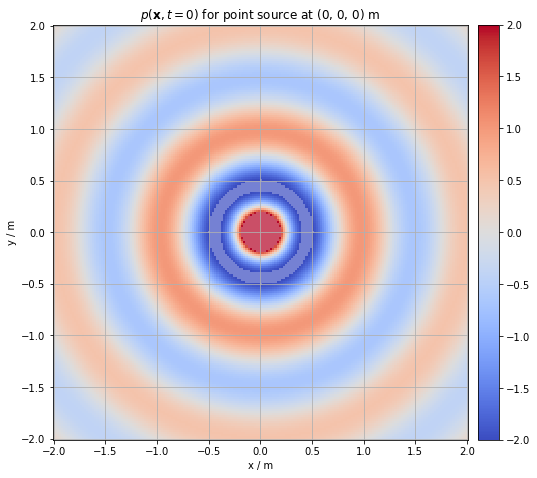

In [2]:
# points (grid) where the sound pressure is calculated
grid = sfs.util.xyz_grid([-2, 2], [-2, 2], 0, spacing=0.02)
# calculate pressure field of point source
p = sfs.fd.source.point(omega, x0, grid)
# plot pressure field
plt.figure(figsize=(8 ,8))
sfs.plot2d.amplitude(p * normalization, grid)
plt.grid()
plt.title(r'$p(\mathbf{x},t=0)$' + ' for point source at {} m'.format(x0));

## Particle Velocity Field

The velocity field of the point source can be derived by applying Euler's equation [[Eq. (2.27) & Sec.3.3](http://doi.org/10.1007/978-3-662-47704-5)]

\begin{equation}
\mathbf{V}(\mathbf{x}, \omega) = - \frac{1}{j \omega \rho_0} \nabla P(\mathbf{x}, \omega) 
\end{equation}

with the static density $\rho_0$ of the compressible medium (e.g. air).

It can be concluded that the velocity field of the point source has only a radial component $\mathbf{V}(\mathbf{x}, \omega) = V_\mathrm{r}(r, \omega) \vec{e}_r$ due its radial symmetry and the fact that sound waves are longitudinal waves. Evaluation of Euler's formula for the pressure field of a point source yields

\begin{equation}
\begin{split}
V_\mathrm{r}(r, \omega) &= - \frac{1}{j \omega \rho_0} \frac{\partial P(\mathbf{x}, \omega)}{\partial r} \\
&= \frac{1}{\rho_0 c} \left(1 + \frac{1}{j \frac{\omega}{c} r} \right) \frac{1}{4 \pi r} \; e^{-j \frac{\omega}{c} r}
\end{split}
\end{equation}

We can identify the last two terms to be equal to the pressure field of a point source.

**Example**

The particle velocity is computed at given positions (spatial grid) using the `sfs` toolbox. It is visualized by arrows showing the direction and magnitude of the particles. The magnitude is indicated by the width of the arrows.

We see that for positive pressure (i.e. compression) particle velocity is directed outwards, for negative pressure (i.e. expansion) the particle velocity is directed inwards, for zero pressure the velocity is also zero, i.e. there is no movement of the particles.

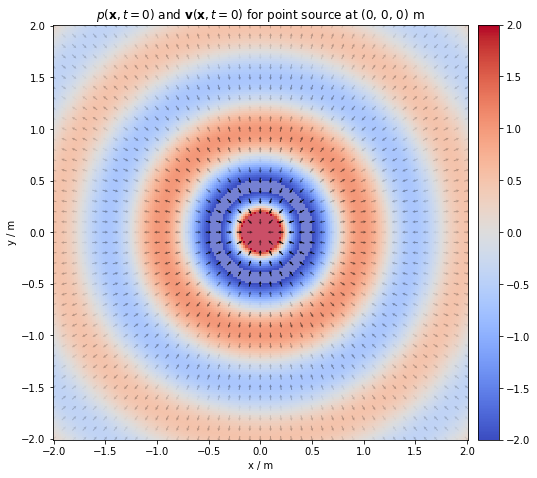

In [3]:
# grid for velocity
vgrid = sfs.util.xyz_grid([-2, 2], [-2, 2], 0, spacing=0.1)
# particle velocity of point source
v = sfs.fd.source.point_velocity(omega, x0, vgrid)
# plot pressure and velocity field
plt.figure(figsize=(8, 8))
sfs.plot2d.amplitude(p * normalization, grid)
sfs.plot2d.vectors(v * normalization, vgrid)
plt.title(r'$p(\mathbf{x},t=0)$ and $\mathbf{v}(\mathbf{x},t=0)$' + ' for point source at {} m'.format(x0));

The particle velocity may also be used to calculate the particle displacement vector by evaluating

\begin{equation}
\mathbf{d}(\mathbf{x}, t) = \int_{-\infty}^t \mathbf{v}(\mathbf{x}, \tau) d\tau
\end{equation}

By starting with a homogeneous distribution of particles one can visualize the particle density at a given time-instant by adding the displacement to the initial positions of the particles. The displacement is amplified in the following example for ease of visibility.

It is important to realize that particles do not travel with the speed of sound from there initial position. They only vibrate around there initial position. Energy transport via the wave is realized by exchanging potential and kinetic energy between the particles.

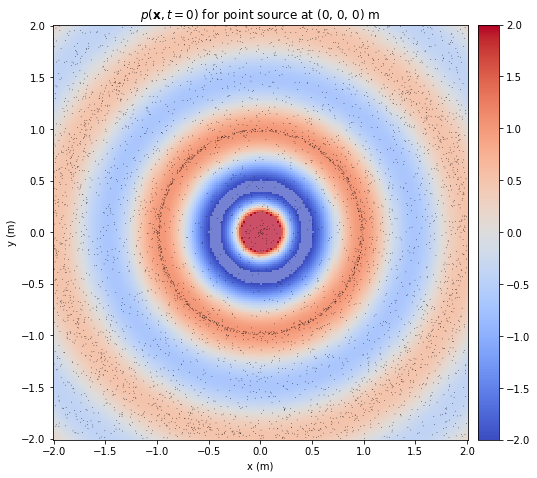

In [4]:
# random grid for particles
pgrid = [np.random.uniform(-2.5, 2.5, 8000), np.random.uniform(-2.5, 2.5, 8000), 0]
# particle velocity of point source
v = sfs.fd.source.point_velocity(omega, x0, pgrid)
# compute displacement of particles
X = pgrid + 2e6 * sfs.fd.displacement(v, omega)
# plot pressure field and particles
fig = plt.figure(figsize=(8, 8))
sfs.plot2d.amplitude(p * normalization, grid)
sfs.plot2d.particles(X, trim=[-2, 2, -2, 2], ax=fig.gca(), facecolor='black', alpha=1, s=2)
plt.title(r'$p(\mathbf{x},t=0)$' + ' for point source at {} m'.format(x0));

## Specific Acoustic Impedance

The [specific acoustic impedance](https://en.wikipedia.org/wiki/Acoustic_impedance) of a source is given as the quotient between sound pressure and particle velocity in a specific direction. The particle velocity of the point source has only a contribution in radial direction. Hence, the specific acoustic impedance of the point source is given as

\begin{equation}
Z(r, \omega) = \frac{P(r, \omega)}{V_r(r, \omega)} = \frac{\rho_0 c}{1 + \frac{1}{j \frac{\omega}{c} r}}
\end{equation}

The specific acoustic impedance provides insights into the relation between pressure and the velocity. Both are in-phase if the impedance is real-valued. The specific acoustic impedance of a plane wave is given as $Z_0 = \rho_0 c$. It is known as characteristic acoustic impedance, for air with $c= 343 \text{m/s}$ and $\rho_0 = 1.204 \frac{\text{kg}}{\text{m}^3}$ at $T=20^\circ\,\text{C}$ this amounts to $Z_0 = 413 \frac{\text{kg}}{\text{m}^2 \text{s} }$. Inspection of above relation for a point source yields that in the limit

\begin{equation}
\lim_{\frac{\omega}{c} r \to \infty} Z(r, \omega) = Z_0.
\end{equation}

The specific acoustic impedance $Z(r, \omega)$ of a point source approaches the characteristic impedance for high frequencies $\omega$ and/or large distances $r$. This is termed as *far-field* of a sound source. Since the specific impedance is real-valued, both pressure and velocity are in-phase in this case.

**Example**

The example plots the specific acoustic impedance of the point source as a function of $\frac{\omega}{c} r$. It can be observed that the characteristic acoustic impedance is approached for quite low frequencies and/or distances, cf. $\frac{\omega}{c} r > 2 \pi$.

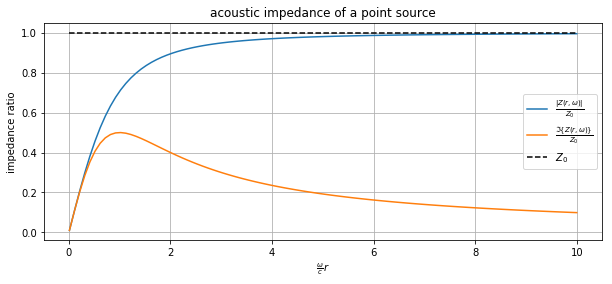

In [5]:
# calculate specific acoustic impedance
kr = np.linspace(0.01, 10, 100)
Z = 1/(1+ 1/(1j*kr))
# plot specific acoustic impedance
plt.figure(figsize=(10,4))
plt.plot(kr, abs(Z), label=r'$\frac{|Z(r, \omega)|}{Z_0}$')
plt.plot(kr, np.imag(Z), label=r'$\frac{\Im \{Z(r, \omega)\}}{Z_0}$')
plt.plot(kr, np.ones(len(kr)), 'k--' , label=r'$Z_0$')
plt.xlabel(r'$\frac{\omega}{c} r$')
plt.ylabel(r'impedance ratio')
plt.title('acoustic impedance of a point source')
plt.legend()
plt.grid()

Next, in order to illustrate the phase relations between the pressure and the radial velocity of a point source both are plotted with respect to the distance $r$. If we use $f= 343\,\text{Hz}$ and $c= 343\,\text{m/s}$ we can expect that $\frac{\omega}{c} r > 2 \pi$ holds if $r>1\,\text{m}$. Then the in-phase condition is reasonable well approximated as seen in the plot below.

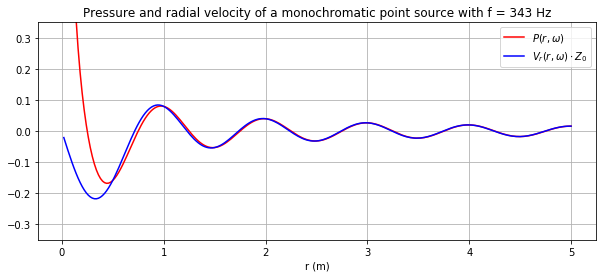

In [6]:
# radial grid
grid = sfs.util.xyz_grid([0.02, 5], 0, 0, spacing=0.02)
# compute velocity and pressure field
v = sfs.fd.source.point_velocity(omega, [0, 0, 0], grid)
p = sfs.fd.source.point(omega, [0, 0, 0], grid)
Z0 = sfs.default.c*sfs.default.rho0
# plot pressure and velocity
plt.figure(figsize=(10,4))
plt.plot(grid[0], np.real(p), 'r-', label=r'$P(r, \omega)$')
plt.plot(grid[0], np.real(v[0]) * Z0, 'b-', label=r'$V_r(r, \omega) \cdot Z_0$')
plt.xlabel('r (m)')
plt.title('Pressure and radial velocity of a monochromatic point source with f = {} Hz'.format(f))
plt.legend()
plt.grid()
plt.ylim([-.35, .35]);

## Intensity

The intensity of a sound field is defined as

\begin{equation}
\mathbf{i}(\mathbf{x}, t) = p(\mathbf{x}, t) \mathbf{v}(\mathbf{x}, t) .
\end{equation}

It characterizes the instantaneous power density (power per area) in the sound field. Thus, the acoustic power passing through some surface is given by integrating the intensity over the surface. For stationary sound sources the time-averaged intensity is commonly used. The power density can further be split into its active and reactive parts. The time-averaged active intensity for a monochromatic source is then given as [[Sec. 2.4](http://doi.org/10.1007/978-3-662-47704-5)]

\begin{equation}
\bar{\mathbf{I}}(\mathbf{x}, \omega) = \frac{1}{2} \Re \{ P(\mathbf{x}, \omega) \mathbf{V}(\mathbf{x}, \omega) \} .
\end{equation}

For the point source, the time-averaged intensity has only a radial component due to its velocity field. Introducing the pressure and velocity field into above equation yields

\begin{equation}
\begin{split}
\bar{I}_r(r, \omega) &= \frac{1}{2} \Re \left\{ \frac{1}{(4 \pi r)^2 \rho_0 c} (1 + \frac{j}{\frac{\omega}{c} r}) \right\} \\
&= \frac{1}{2 (4 \pi)^2 \rho_0 c} \frac{1}{r^2} .
\end{split}
\end{equation}

The time-averaged active intensity points radially outwards with respect to the position of the point source. Its magnitude is inverse proportional to the squared distance $r^2$. This relation is known as [inverse square law](https://en.wikipedia.org/wiki/Inverse-square_law).

Integrating the time-averaged active intensity over a sphere of radius $r$ yields the active power in the sound field of a unit-amplitude point source

\begin{equation}
P = \frac{1}{8 \pi \rho_0 c}.
\end{equation}

When normalizing the unit-amplitude point source with $\cdot\,4 \pi$, such that pressure magnitude is one at one meter distance we have

\begin{equation}
P = \frac{4 \pi}{8 \pi \rho_0 c} = \frac{1}{2 \rho_0 c},
\end{equation}

i.e. the same power as a plane wave with unit pressure magnitude.

**Example**

The active power of a unit-amplitude point source is calculated in the following.

In [7]:
P = 1/(8*np.pi*sfs.default.rho0*sfs.default.c)
print('Active power of unit-amplitude point source is {:02.2e} Watts'.format(P))

Active power of unit-amplitude point source is 9.47e-05 Watts


**Copyright**

This notebook is provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text/images/data are licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Selected Topics in Audio Signal Processing - Supplementary Material, 2017-2018*.